In [ ]:
%load_ext autoreload

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
from scipy import stats
import glob # To count files in folder
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff, feature_extraction,polycoherence,clustering

import hilbert

#  <font color='#FF4E00'>WT04</font> 


In [15]:
_, times, op_data_intervals, _ = load_raw_signals.load_raw('gearbox','wt04')

File exist


# Printing just the IMFs and the kurtosis value

In [51]:
from pathlib import Path
from scipy.stats import kurtosis, skew

def plot_imfs_and_kurtosis(path_folder,SAVE_FILE_NAME,times,input_file_type,input_signal_origin='filtered_6000'):
    # import all IMFs:
    fs=25600

    highcut_lp = 2000

    file_count = len(glob.glob1(path_folder,"*.csv"))
    print("file count:", file_count)


    for i in range(file_count):
        if input_file_type == 'csv':
            path=path_folder + f'interval_number_{i}.csv'
            df = pd.read_csv(path, header=None)
        if input_file_type == 'zip':
            path=path_folder + f'raw_wt04_interval_number_{i}.zip'
            df = pd.read_csv(path,compression='zip')
        # s = df.to_numpy()


        fig, axs = plt.subplots(df.shape[0], figsize=(15, 25), facecolor='w', edgecolor='k')


        for j in range(df.shape[0]): # Looping through the IMFs
            kurt = kurtosis(df.iloc[j,:].to_numpy())
            kurt = round(kurt, 4)

            if j==0:
                axs[j].set_title(f"EEMD decomposition for WT 4\ninterval number {i}\n\nKurtosis: {kurt}")
                axs[j].plot(times[j][0:20000],df.iloc[j,:].to_numpy(),color='#F87060')
                if input_signal_origin =='filtered_signal':
                    axs[j].set_ylabel('Filtered signal')
                if input_signal_origin =='raw_signal':
                    axs[j].set_ylabel('Raw signal')

            else:
                axs[j].set_title(f"Kurtosis: {kurt}")
                axs[j].plot(times[j][0:20000],df.iloc[j,:].to_numpy())
                axs[j].set_ylabel(f'IMF{j}')

            #axs[j].set_xlabel('Seconds [s]')
            axs[j].margins(0)
            axs[j].grid(b=None)

        fig.text(0.5, -0.003, 'Time [s]', ha='center',fontsize=14) #global xlabel
        plt.tight_layout(pad=2)


        plt.savefig(f'../../plots/{SAVE_FILE_NAME}.png',dpi=200)
        plt.show()

        print("######## NEXT INTERVAL ########")
        if i == 1:
            break

#path_folder='/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'
#plot_imfs_and_kurtosis(path_folder,'eemd_wt04_interval_00',times,'csv')

# WT04: Get the max kurtosis value for all IMFs for each interval

In [78]:
# Get the max kurtosis value for all IMFs for each interval

from pathlib import Path

# import all IMFs:
fs=25600
path_folder = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'
highcut_lp = 2000

file_count = len(glob.glob1(path_folder,"*.csv"))
print("file count:", file_count)

max_kurt_inteval = []
for i in range(file_count):
    path=path_folder + f'interval_number_{i}.csv'
    df = pd.read_csv(path, header=None)
    
    max_kurt = 0
    for j in range(df.shape[0]): # Looping through the IMFs
        if j > 5:
            # We just need the first 6 imfs. (higher frequency information)
            break
        kurt = kurtosis(df.iloc[j,:].to_numpy())
        kurt = round(kurt, 4)
        if kurt > max_kurt:
            max_kurt = kurt
            
    max_kurt_inteval.append(max_kurt) # Append the max kurt

print(max_kurt_inteval)



file count: 424
######## NEXT INTERVAL ########
0
######## NEXT INTERVAL ########
1
######## NEXT INTERVAL ########
2
######## NEXT INTERVAL ########
3
######## NEXT INTERVAL ########
4
######## NEXT INTERVAL ########
5
######## NEXT INTERVAL ########
6
######## NEXT INTERVAL ########
7
######## NEXT INTERVAL ########
8
######## NEXT INTERVAL ########
9
######## NEXT INTERVAL ########
10
######## NEXT INTERVAL ########
11
######## NEXT INTERVAL ########
12
######## NEXT INTERVAL ########
13
######## NEXT INTERVAL ########
14
######## NEXT INTERVAL ########
15
######## NEXT INTERVAL ########
16
######## NEXT INTERVAL ########
17
######## NEXT INTERVAL ########
18
######## NEXT INTERVAL ########
19
######## NEXT INTERVAL ########
20
######## NEXT INTERVAL ########
21
######## NEXT INTERVAL ########
22
######## NEXT INTERVAL ########
23
######## NEXT INTERVAL ########
24
######## NEXT INTERVAL ########
25
######## NEXT INTERVAL ########
26
######## NEXT INTERVAL ########
27
######## NEXT 

######## NEXT INTERVAL ########
231
######## NEXT INTERVAL ########
232
######## NEXT INTERVAL ########
233
######## NEXT INTERVAL ########
234
######## NEXT INTERVAL ########
235
######## NEXT INTERVAL ########
236
######## NEXT INTERVAL ########
237
######## NEXT INTERVAL ########
238
######## NEXT INTERVAL ########
239
######## NEXT INTERVAL ########
240
######## NEXT INTERVAL ########
241
######## NEXT INTERVAL ########
242
######## NEXT INTERVAL ########
243
######## NEXT INTERVAL ########
244
######## NEXT INTERVAL ########
245
######## NEXT INTERVAL ########
246
######## NEXT INTERVAL ########
247
######## NEXT INTERVAL ########
248
######## NEXT INTERVAL ########
249
######## NEXT INTERVAL ########
250
######## NEXT INTERVAL ########
251
######## NEXT INTERVAL ########
252
######## NEXT INTERVAL ########
253
######## NEXT INTERVAL ########
254
######## NEXT INTERVAL ########
255
######## NEXT INTERVAL ########
256
######## NEXT INTERVAL ########
257
######## NEXT INTERVAL #####

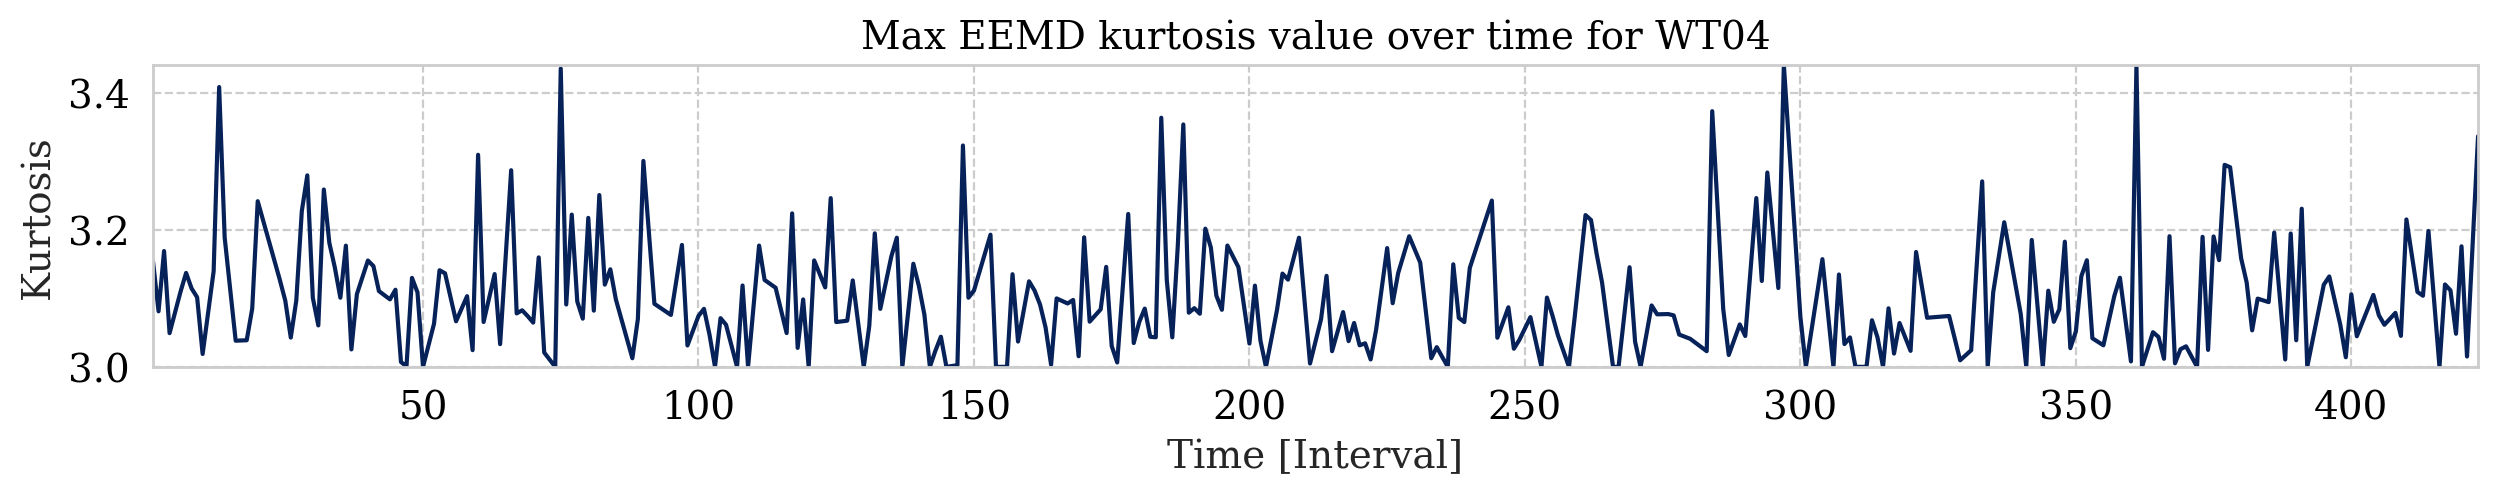

In [140]:
# [x for x in X if P(x)]
max_kurt_inteval_filt=[x+3 for x in max_kurt_inteval]
len(max_kurt_inteval_filt)
op_data_intervals_copy = op_data_intervals
op_data_intervals_copy['kurtosis']=max_kurt_inteval_filt
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['AvgSpeed']>1400]
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['kurtosis']<3.5]
op_data_intervals_copy['kurtosis'].plot(figsize=(15,2))
plt.title('Max EEMD kurtosis value over time for WT04')
plt.margins(0)
plt.xlabel("Time [Interval]")
plt.ylabel("Kurtosis")
plt.show()

In [77]:
from pathlib import Path

SELECETED_IMF = 5


# import all IMFs:
fs=25600
path_folder = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'
highcut_lp = 2000

file_count = len(glob.glob1(path_folder,"*.csv"))
print("file count:", file_count)

sum_kurt = 0
for i in range(file_count):
    path=path_folder + f'interval_number_{i}.csv'
    df = pd.read_csv(path, header=None)
    sum_kurt += kurtosis(df.iloc[SELECETED_IMF,:].to_numpy())
    print(sum_kurt)
    
mean_kurt=sum_kurt/((file_count))
print(mean_kurt)

# Problem here is that the kurtosis of the selected imf is not optimal...

file count: 424
0.15895440134649297
0.011300733217420422
-0.23909663974998674
-0.45196329317925077
-0.40262840010331047
-0.4818306980984781
-0.3716252300824503
-0.23419781340548207
-0.40185208829391605
-0.3000965353768592
-0.36062995006544574
-0.16930692626835864
-0.029430730187907095
0.3798368477217666
0.5397772249918185
0.8205335154941089
0.854817846410191
0.7777090776346158
0.6934811686187698
0.7785828341189553
1.020892051090644
0.8924168133272858
0.7511472237536454
0.575182908095198
0.33528206675107475
0.14169851387092436
0.18454167788082598
0.2814427328262199
0.509183060041849
0.7892510774296229
0.8902011809605908
0.9363986648868265
1.1958066832838528
1.3769738196918935
1.522208513800381
1.2999658016227835
1.2416341399590003
1.0159387300672909
0.9475457462459644
1.3935092703521361
1.281103164292222
1.4284790577220736
1.5393272991125402
1.3381473993946682
1.4368238054452371
1.359768320700145
1.3187554257580536
1.3037777232085999
0.9937067494536516
1.0439475063472252
0.9689702865947

KeyboardInterrupt: 

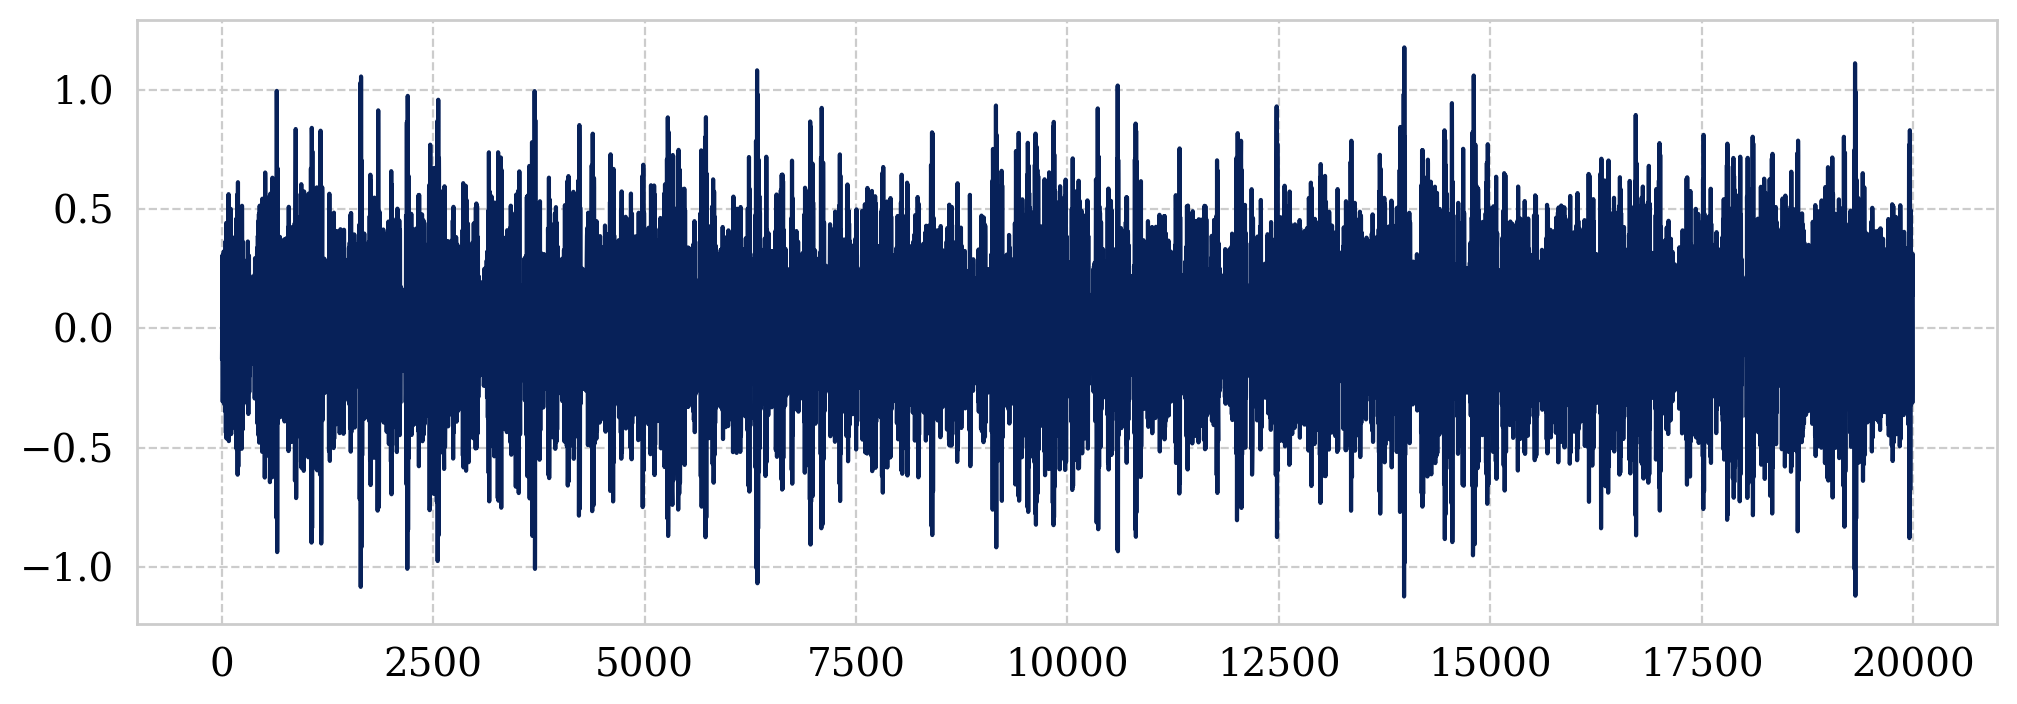

In [41]:
from pathlib import Path

SELECETED_IMF = 4


# import all IMFs:
fs=25600
path_folder = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'
highcut_lp = 2000

file_count = len(glob.glob1(path_folder,"*.csv"))
print("file count:", file_count)

sum_kurt = 0
for i in range(file_count):
    path=path_folder + f'interval_number_{i}.csv'
    df = pd.read_csv(path, header=None)
    sum_kurt += kurtosis(df.iloc[SELECETED_IMF,:].to_numpy())
    print(sum_kurt)
    
mean_kurt=sum_kurt/((file_count))
print(mean_kurt)

# Problem here is 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


def perform_hilbert(signal,t):
    fs=25600
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)
    fig = plt.figure()
    ax0 = fig.add_subplot(211)
    ax0.plot(t, signal, label='signal')
    ax0.plot(t, amplitude_envelope, label='envelope')
    ax0.set_xlabel("time in seconds")
    ax0.legend()
    ax1 = fig.add_subplot(212)
    ax1.plot(t[1:], instantaneous_frequency)
    ax1.set_xlabel("time in seconds")
    ax1.set_ylim(0.0, 120.0)
    return amplitude_envelope

3


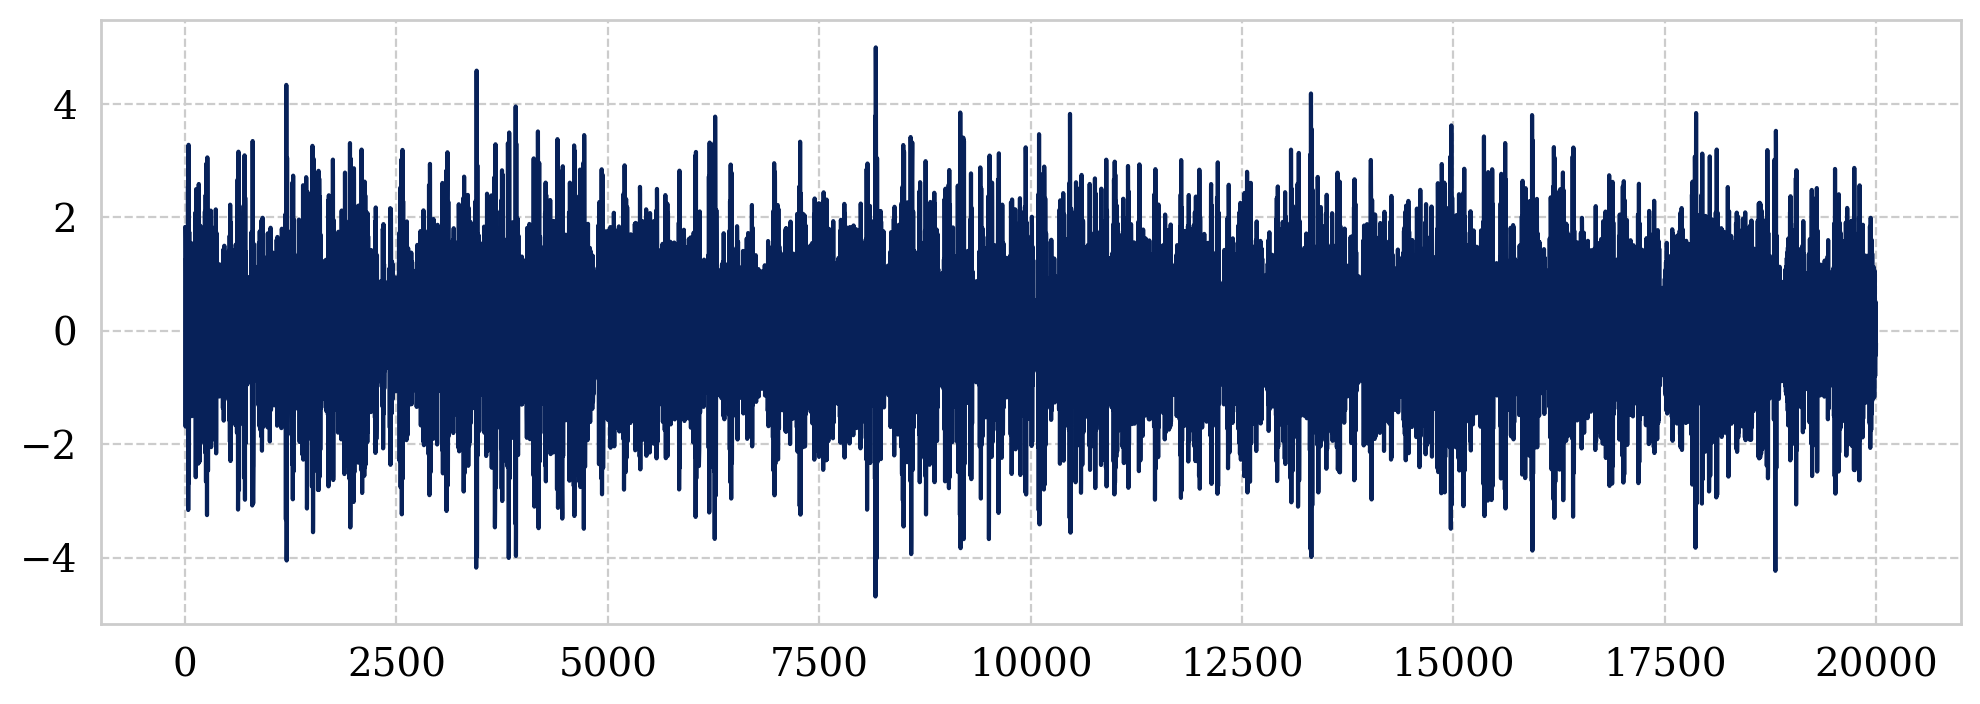

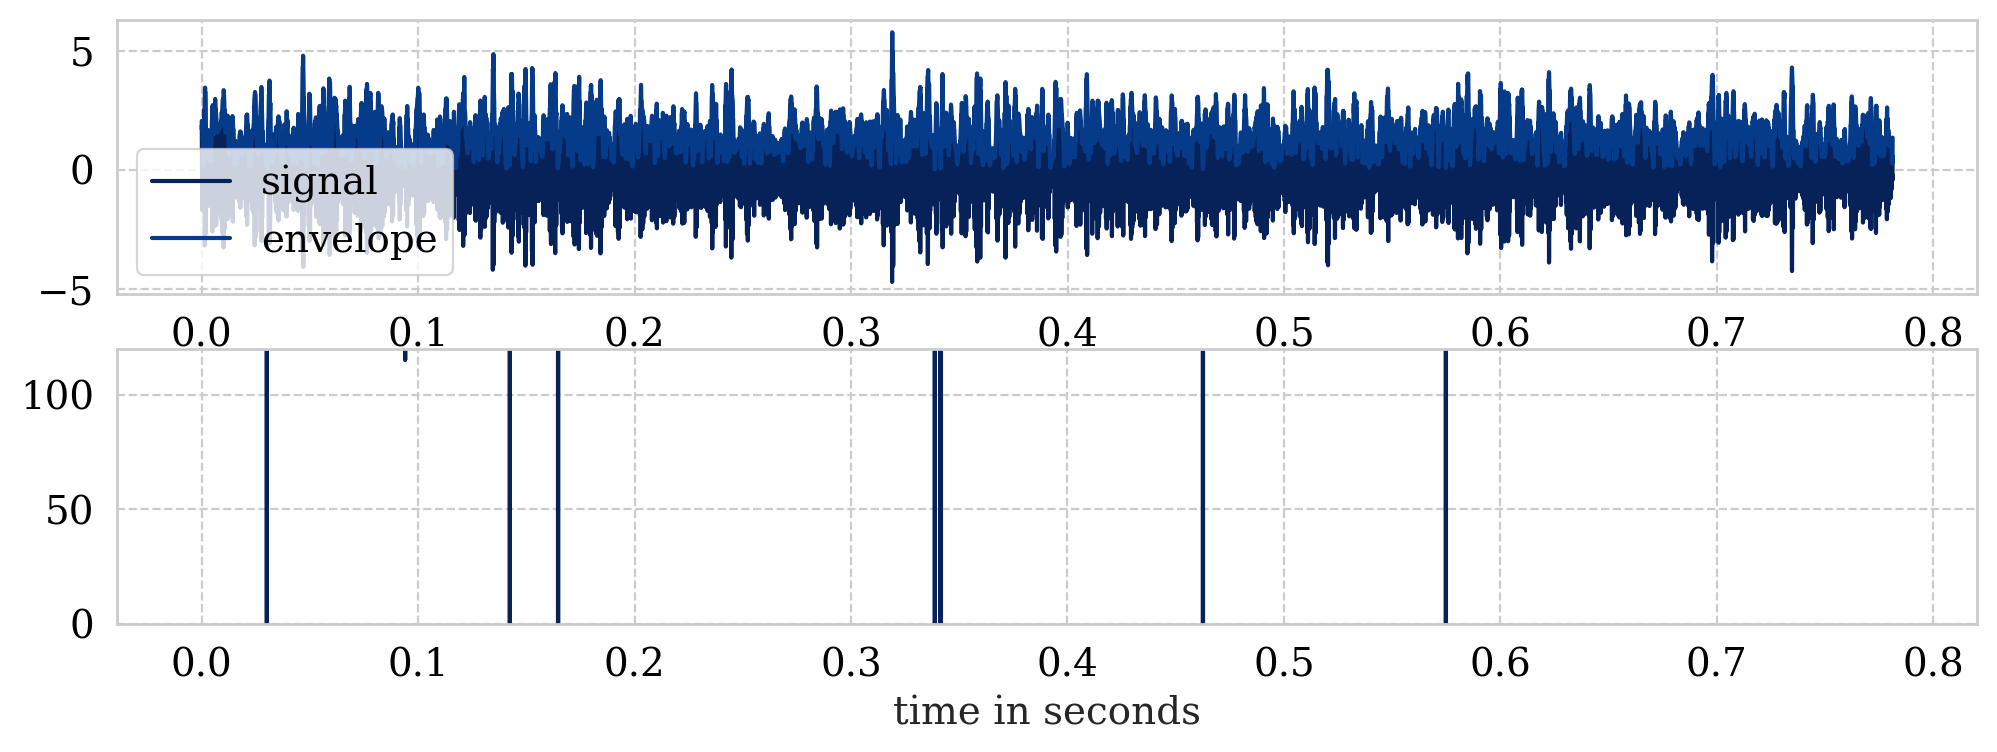

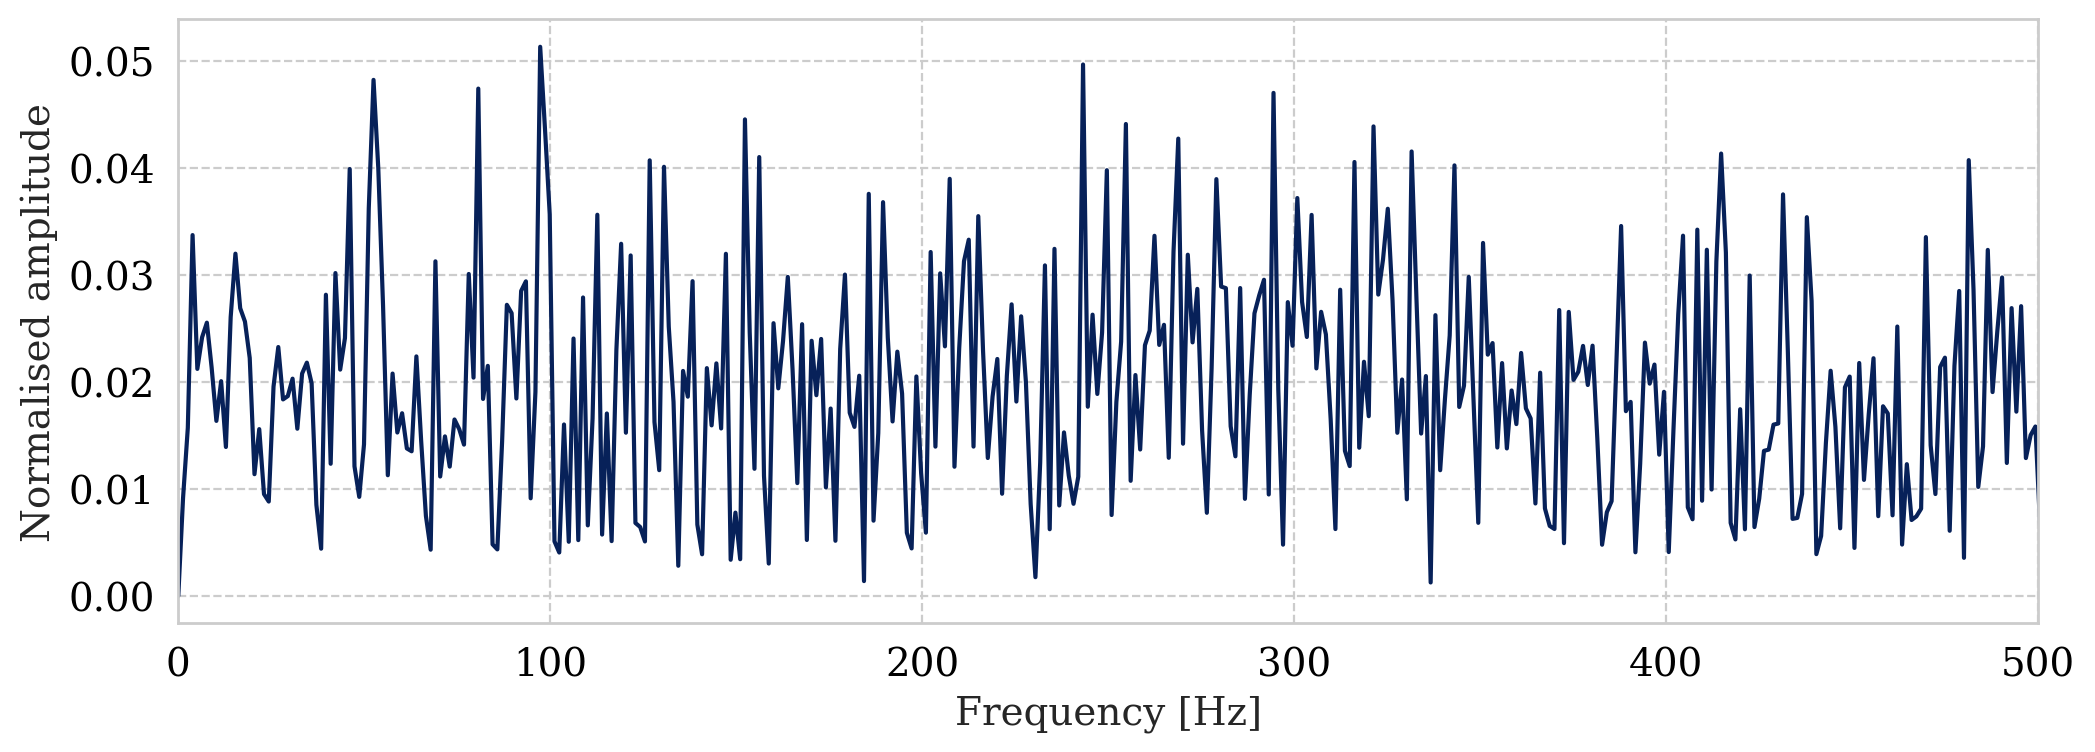

-0.07027737183381255
NEW IMF!


In [63]:
for i in range(1,6):
    if i == 3:
        print(i)
        myarray= df.iloc[i,:].to_numpy()
        myarray
        plt.plot(myarray)


        t=times[0][0:20000]
        res=perform_hilbert(myarray[0:20000],t)

        final_signal1 = envelope.perform_fft(res,times[0][0:20000],plot=True)

        plt.show()
        plt.plot(final_signal1['freq'],final_signal1['fft_norm'])
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Normalised amplitude")
        plt.xlim(0,500)
        plt.show()
        kurt = kurtosis(df.iloc[i,:].to_numpy())
        # kurt = kurtosis(sig)
        print(kurt)


        print("NEW IMF!")



3


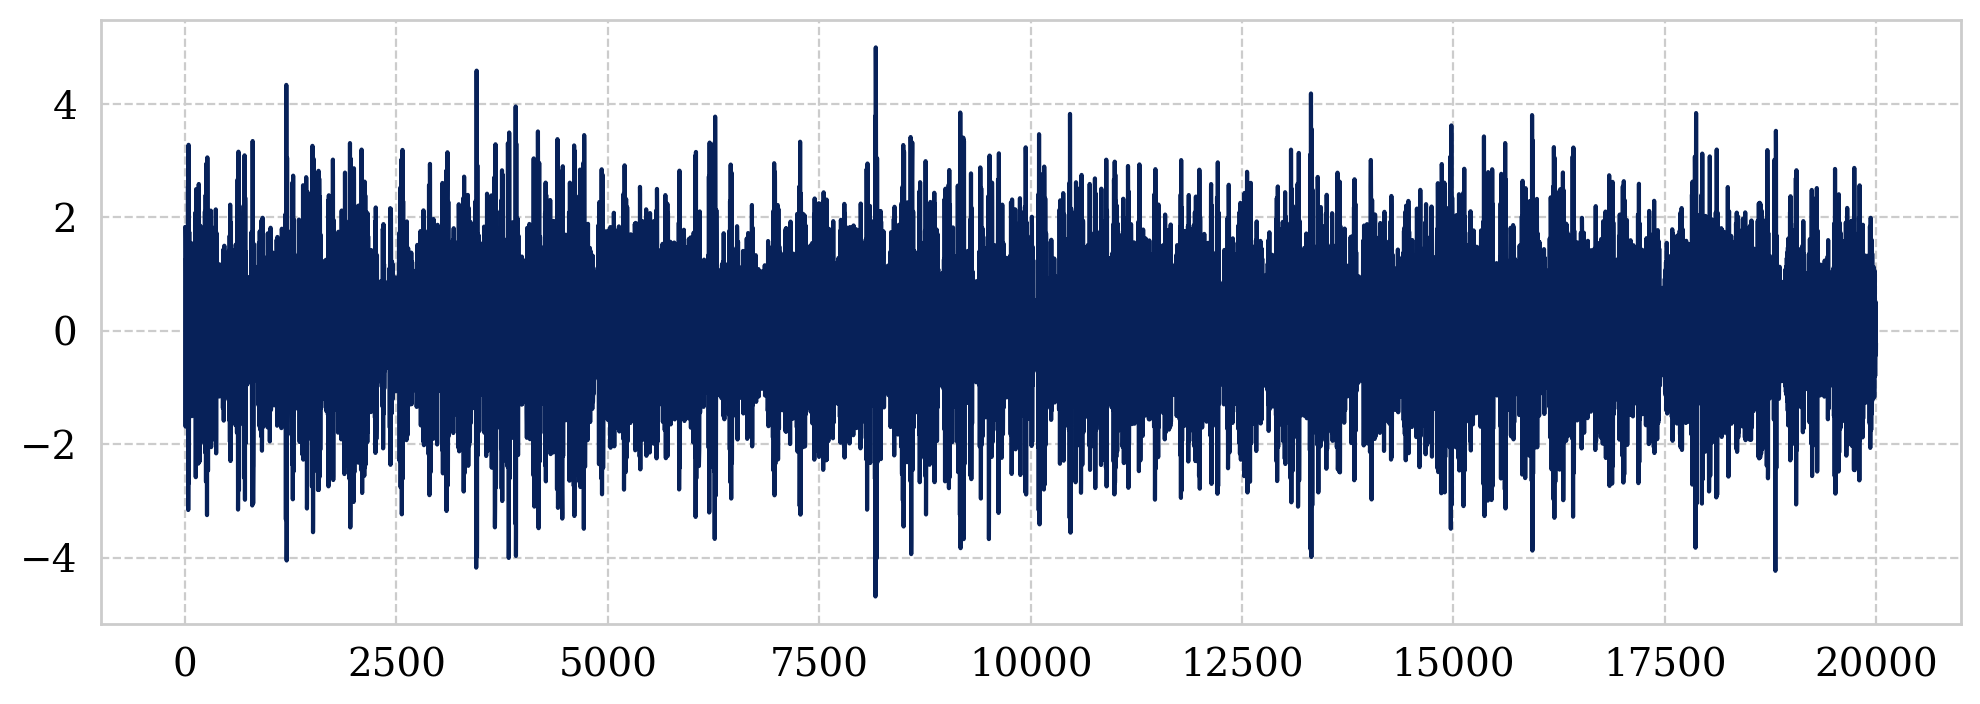

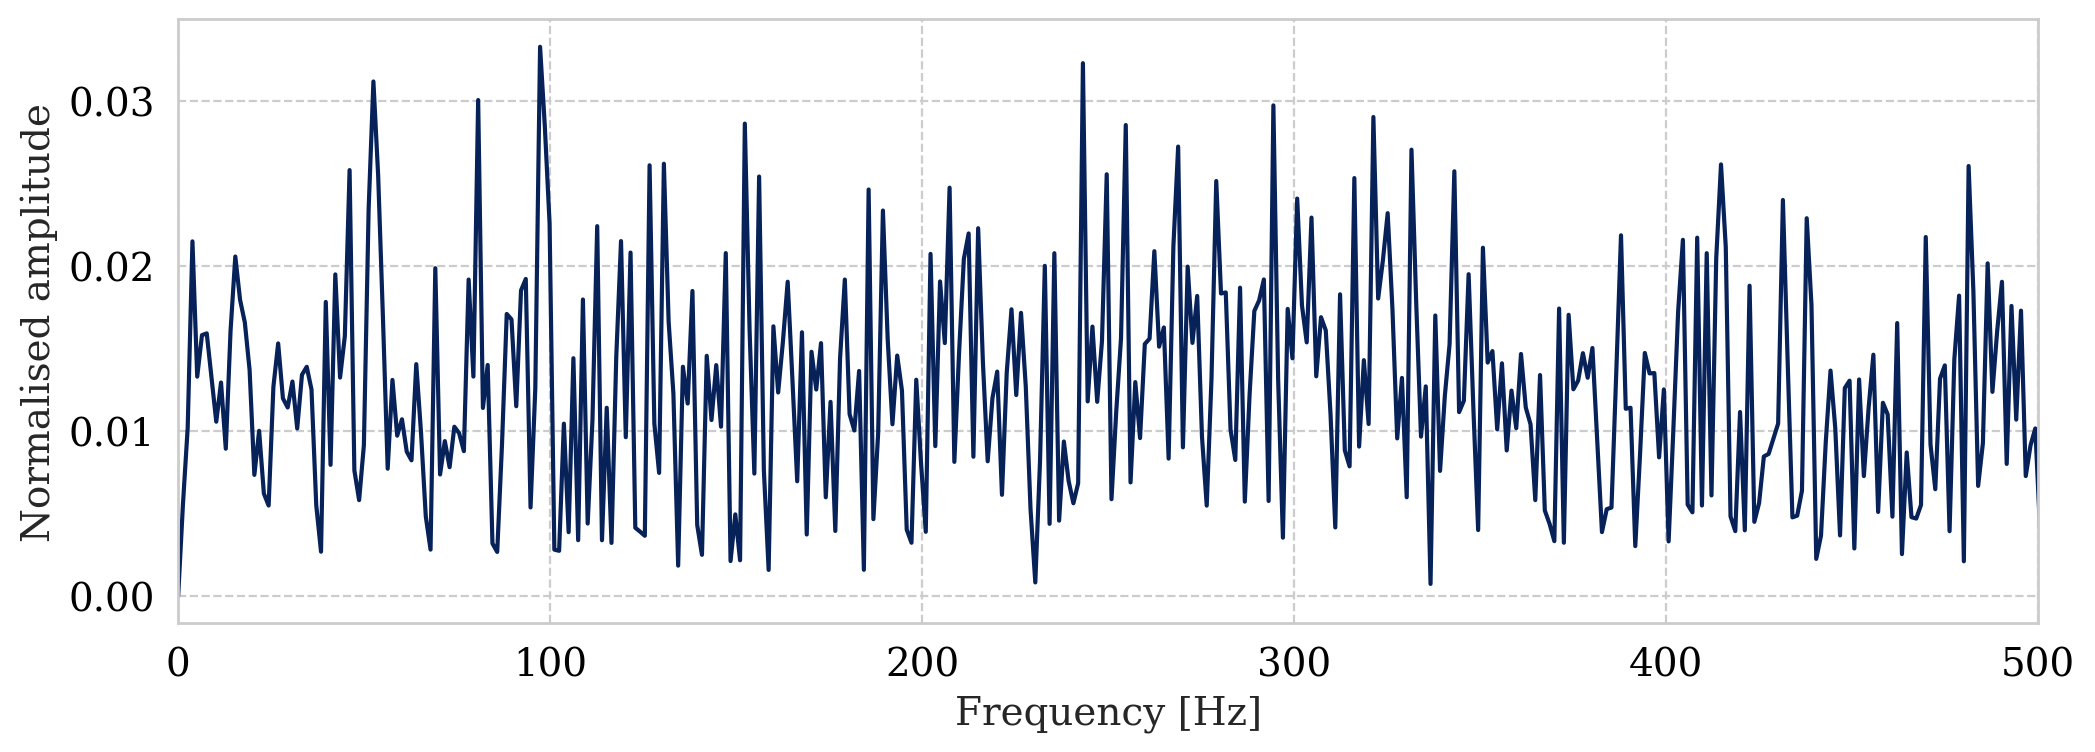

-0.07027737183381255
NEW IMF!


In [64]:
# not doing hilbert ...
for i in range(1,6):
    if i == 3:
        print(i)
        myarray= df.iloc[i,:].to_numpy()
        myarray
        plt.plot(myarray)


        t=times[0][0:20000]
        # res=perform_hilbert(myarray[0:20000],t)
        res = abs(myarray)
        final_signal1 = envelope.perform_fft(res,times[0][0:20000],plot=True)

        plt.show()
        plt.plot(final_signal1['freq'],final_signal1['fft_norm'])
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Normalised amplitude")
        plt.xlim(0,500)
        plt.show()
        kurt = kurtosis(df.iloc[i,:].to_numpy())
        # kurt = kurtosis(sig)
        print(kurt)


        print("NEW IMF!")



#  <font color='#FF4E00'>WT03</font> 


In [143]:
# Get the max kurtosis value for all IMFs for each interval

from pathlib import Path

# import all IMFs:
fs=25600
path_folder = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt03/eemd_signals/'
highcut_lp = 2000

file_count = len(glob.glob1(path_folder,"*.csv"))
print("file count:", file_count)

max_kurt_inteval = []
for i in range(file_count):
    path=path_folder + f'interval_number_{i}.csv'
    df = pd.read_csv(path, header=None)
    
    max_kurt = 0
    for j in range(df.shape[0]): # Looping through the IMFs
        if j > 5:
            # We just need the first 6 imfs. (higher frequency information)
            break
        kurt = kurtosis(df.iloc[j,:].to_numpy())
        kurt = round(kurt, 4)
        if kurt > max_kurt:
            max_kurt = kurt
            
    max_kurt_inteval.append(max_kurt) # Append the max kurt
  
    print(i, end =" ")



file count: 424
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 27

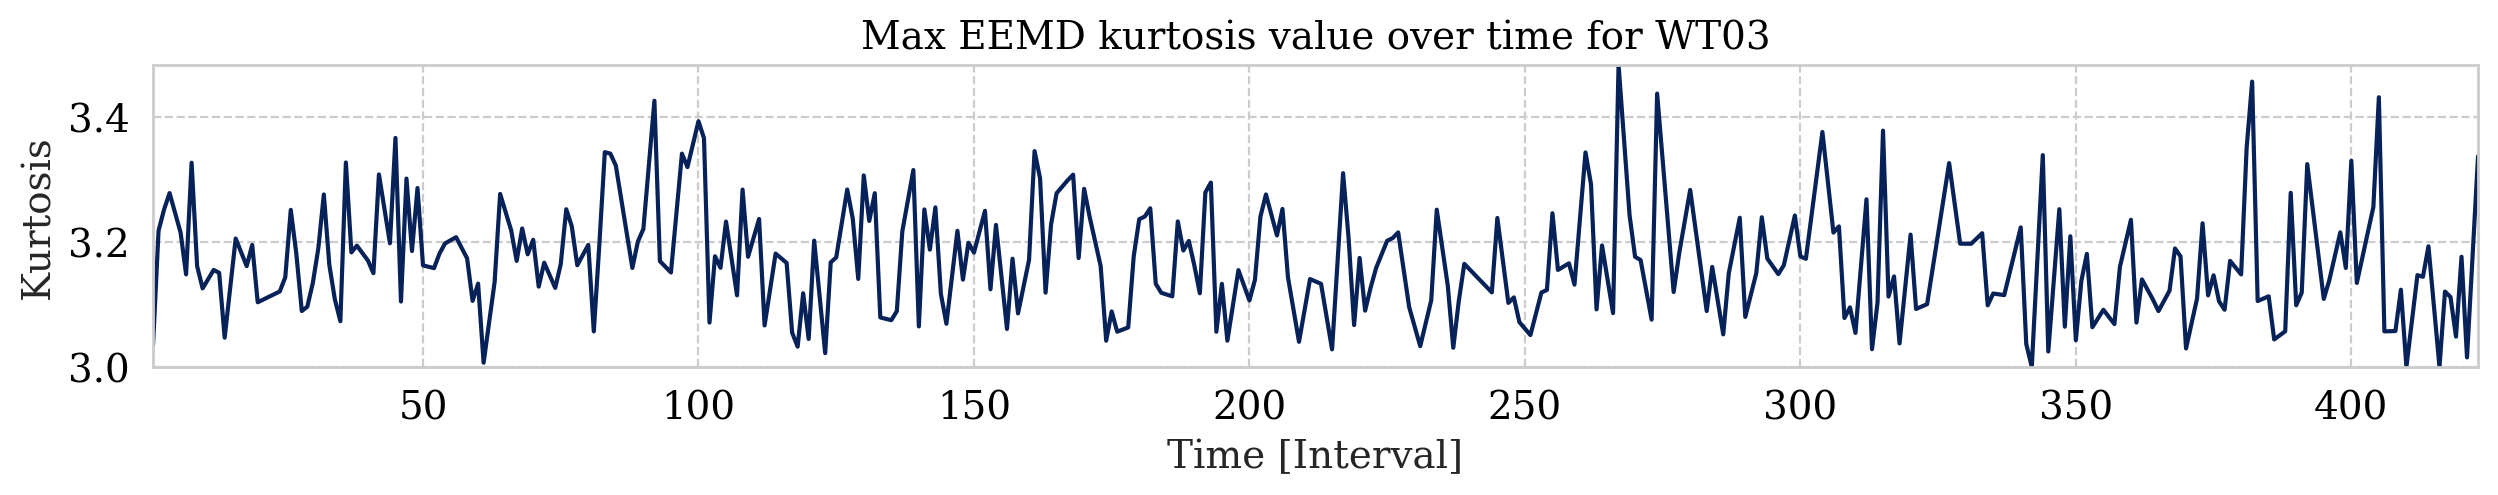

In [145]:
# [x for x in X if P(x)]
max_kurt_inteval_filt=[x+3 for x in max_kurt_inteval]
len(max_kurt_inteval_filt)
op_data_intervals_copy = op_data_intervals
op_data_intervals_copy['kurtosis']=max_kurt_inteval_filt
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['AvgSpeed']>1400]
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['kurtosis']<3.5]
op_data_intervals_copy['kurtosis'].plot(figsize=(15,2))
plt.title('Max EEMD kurtosis value over time for WT03')
plt.margins(0)
plt.xlabel("Time [Interval]")
plt.ylabel("Kurtosis")
plt.show()

# EEMD on the raw signal

In [ ]:
raw_imfs_path='/Volumes/OsvikExtra/signal_data/raw_data/gearbox/wt04/eemds/'
plot_imfs_and_kurtosis(raw_imfs_path,'raw_eemd_wt04_interval_00',times,'zip','raw_signal')

file count: 424
